# Machine Learning Project

Abrir o dataset

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Verificar a existência de valores omissos

In [84]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Verificar a existência de duplicados

In [85]:
df.duplicated().sum()

154

Criar um dataset sem dados duplicados

In [86]:
df_clean = df.drop_duplicates()

Analisar dados estatísticos do dataset

In [87]:
df_clean.describe()

,year,price,mileage,tax,mpg,engineSize
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,2016.862396,12269.556310,23381.146362,113.315012,57.908696,1.350623
std,2.052039,4736.285417,19419.011045,62.034603,10.132696,0.432581
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11288.000000,18277.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31098.500000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Remover os valores com engineSize = 0

In [88]:
df_clean = df[df['engineSize'] != 0.0]
df_clean.describe()

,year,price,mileage,tax,mpg,engineSize
count,17915.000000,17915.000000,17915.000000,17915.000000,17915.000000,17915.000000
mean,2016.865197,12280.966118,23373.346414,113.342004,57.909846,1.354653
std,2.051495,4743.706539,19476.449288,62.016558,10.127366,0.426924
min,1996.000000,495.000000,1.000000,0.000000,20.800000,1.000000
25%,2016.000000,8999.000000,9987.500000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18250.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31083.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Remover linha com o year = 2060

In [89]:
df_clean = df[df['year'] != 2060]
df_clean.describe()
print(df[df['mileage'] < 5000])


              model  year  price transmission  mileage fuelType  tax   mpg  \
4            Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
6              Puma  2019  22500       Manual     2029   Petrol  145  50.4   
35           Mondeo  2019  20000       Manual       24   Diesel  145  65.7   
36         EcoSport  2020  20000       Manual      558   Petrol  145  53.3   
37             Kuga  2019  21378       Manual     3259   Diesel  145  39.2   
...             ...   ...    ...          ...      ...      ...  ...   ...   
17940          Puma  2020  21999       Manual     1879   Petrol  145  50.4   
17941      EcoSport  2020  17499       Manual     1938   Petrol  145  51.4   
17945        Fiesta  2019  15999       Manual     2813   Petrol  145  58.9   
17951      EcoSport  2019  15999       Manual     2200   Petrol  145  51.4   
17956   Grand C-MAX  2018  14750       Manual     4850   Petrol  145  47.1   

       engineSize  
4             1.0  
6             1.0  
35 

## Graficos úteis para analisar o dataset

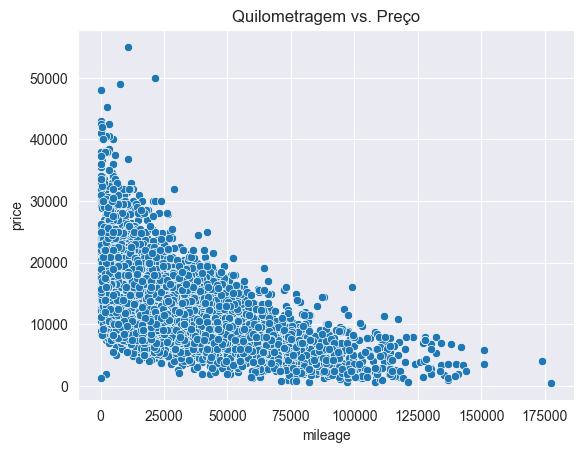

In [90]:
sns.scatterplot(data=df_clean, x='mileage', y='price')
plt.title('Quilometragem vs. Preço')
plt.show()

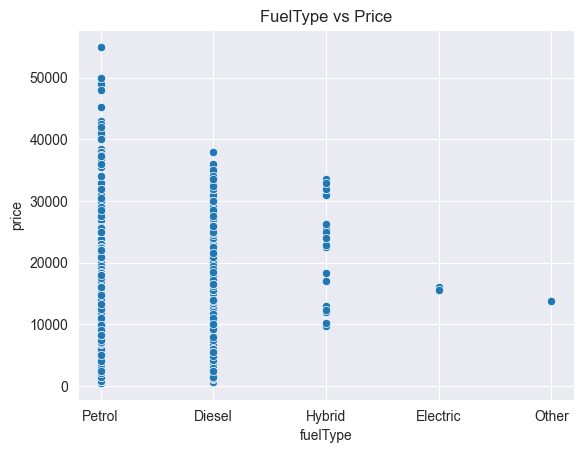

In [91]:
sns.scatterplot(data=df_clean, x='fuelType', y='price')
plt.title('FuelType vs Price')
plt.show()

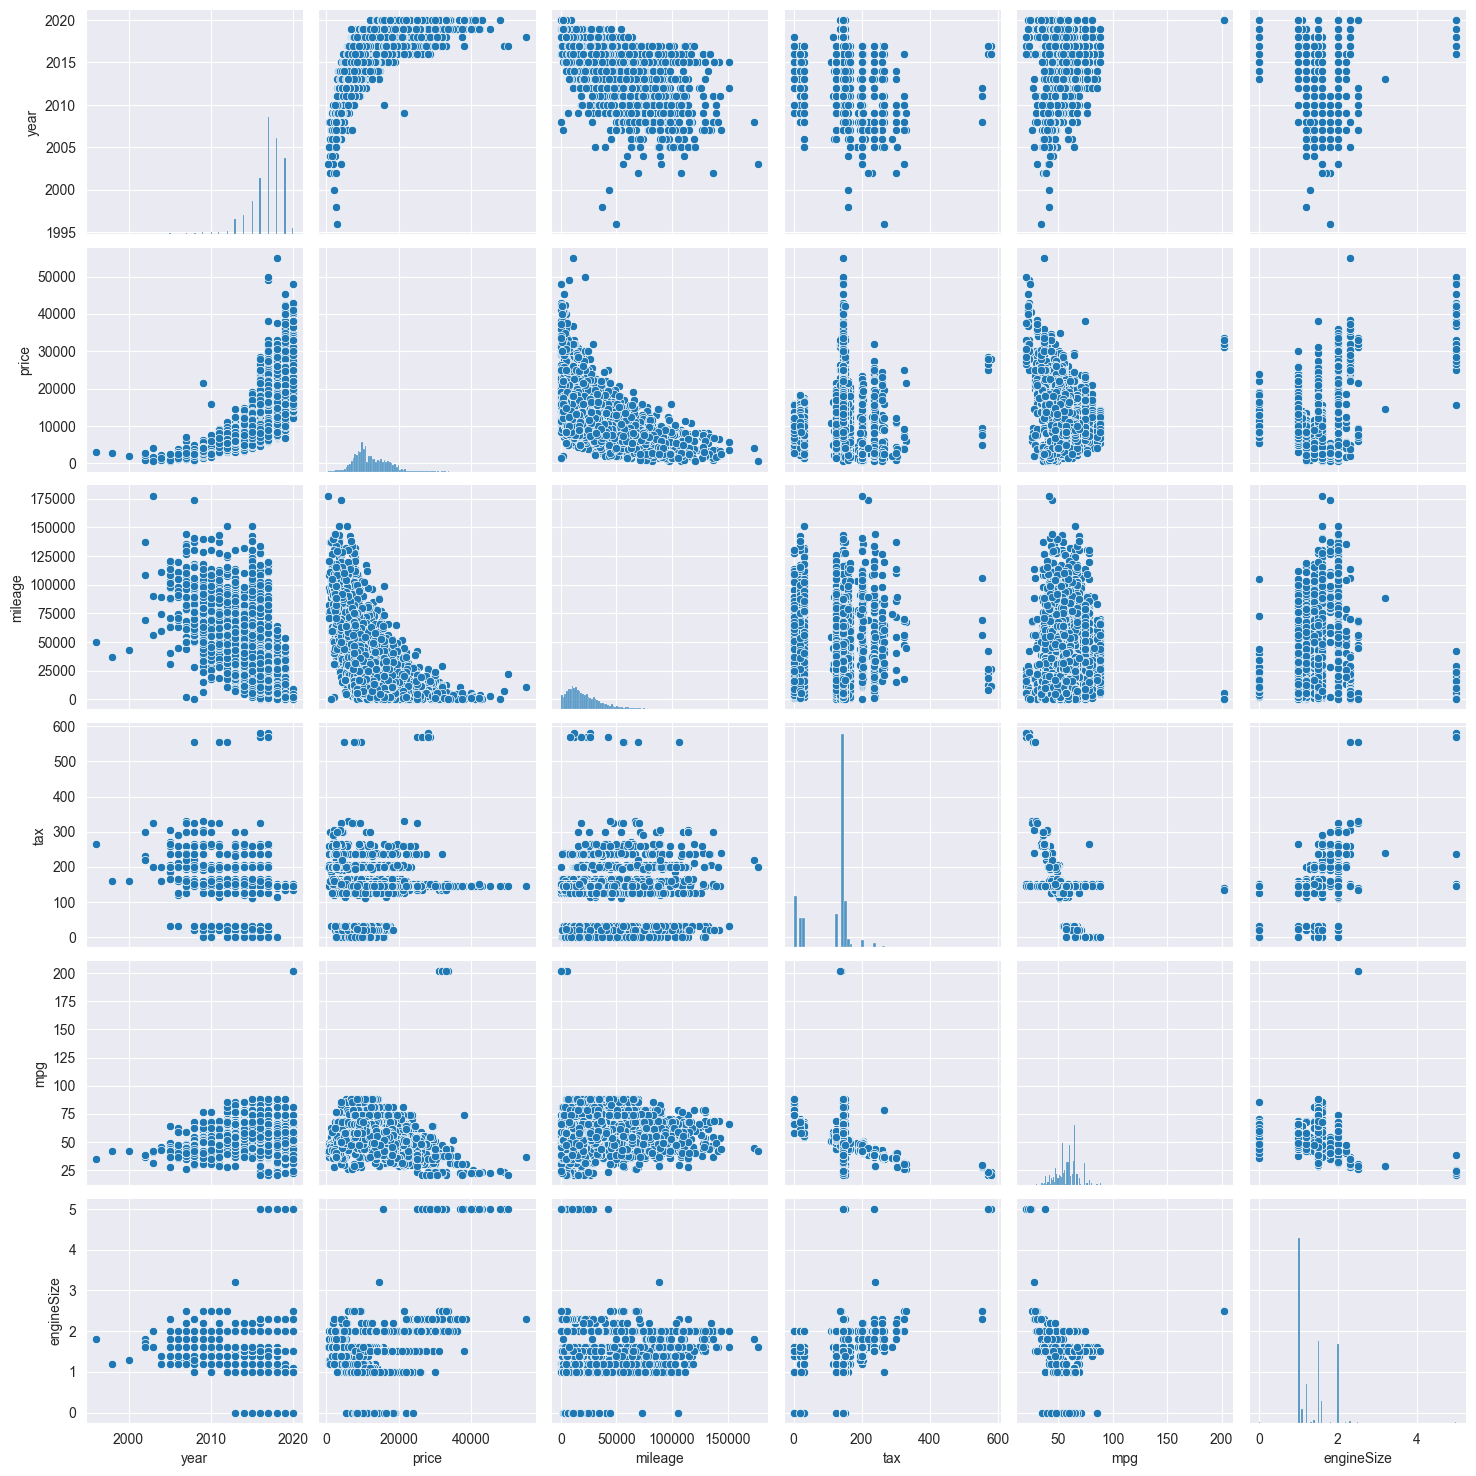

In [92]:
sns.pairplot(df_clean)
plt.show()

## OneHotEncoder
Troca a coluna "fuelType" por 4 colunas diferentes: "fuelType_Diesel", "fuelType_Petrol", "fuelType_Eletric", "fuelType_Other".
Agora dependendo do tipo do combustivel a coluna do tipo de combustivel fica a 1 e o resto fica a 0 e depois elimina a coluna original 

In [93]:
from sklearn.preprocessing import OneHotEncoder

df_clean.loc[:, 'fuelType'] = df_clean['fuelType'].fillna('Unknown')

FuelType_df = df_clean[['fuelType']]
encoder = OneHotEncoder(dtype=int, sparse_output=False)
encoder_data = encoder.fit_transform(FuelType_df)
encoder_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(['fuelType']))

df_clean = pd.concat([df_clean.reset_index(drop=True), encoder_df.reset_index(drop=True)], axis=1)

if 'fuelType' in df_clean.columns:
    df_clean.drop(['fuelType'], axis=1, inplace=True)

if 'fuelType_Unknown' in df_clean.columns:
    df_clean.drop(['fuelType_Unknown'], axis=1, inplace=True)

df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

print(df_clean.shape)
print(encoder_df.shape)

(17965, 13)
(17965, 5)


In [94]:
df_clean.isna().sum()

model                0
year                 0
price                0
transmission         0
mileage              0
tax                  0
mpg                  0
engineSize           0
fuelType_Diesel      0
fuelType_Electric    0
fuelType_Hybrid      0
fuelType_Other       0
fuelType_Petrol      0
dtype: int64

In [95]:
# Se existir, crie o OneHotEncoder
Transmission_df = df_clean[["transmission"]]
encoder = OneHotEncoder(dtype=int, sparse_output=False)
encoder_data = encoder.fit_transform(Transmission_df)
encoder_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(['transmission']))
# Adicione ao DataFrame principal e remova colunas duplicadas
df_clean = pd.concat([df_clean, encoder_df], axis=1)
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

if 'transmission_nan' in df_clean.columns:
    df_clean.drop(['transmission_nan'], axis=1, inplace=True)
    
if 'transmission' in df_clean.columns:
    df_clean.drop(['transmission'], axis=1, inplace=True)
    
print(df_clean.head())
   

     model  year  price  mileage  tax   mpg  engineSize  fuelType_Diesel  \
0   Fiesta  2017  12000    15944  150  57.7         1.0                0   
1    Focus  2018  14000     9083  150  57.7         1.0                0   
2    Focus  2017  13000    12456  150  57.7         1.0                0   
3   Fiesta  2019  17500    10460  145  40.3         1.5                0   
4   Fiesta  2019  16500     1482  145  48.7         1.0                0   

   fuelType_Electric  fuelType_Hybrid  fuelType_Other  fuelType_Petrol  \
0                  0                0               0                1   
1                  0                0               0                1   
2                  0                0               0                1   
3                  0                0               0                1   
4                  0                0               0                1   

   transmission_Automatic  transmission_Manual  transmission_Semi-Auto  
0                       1

In [96]:
Model_df = df_clean[["model"]]
encoder = OneHotEncoder(dtype=int, sparse_output=False)
encoder_data = encoder.fit_transform(Model_df)
encoder_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(['model']))
df_clean = pd.concat([df_clean, encoder_df], axis=1)
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

    
novas_colunas = encoder_df.columns.tolist()
restantes_colunas = [col for col in df_clean.columns if col not in novas_colunas]
colunas_reordenadas = novas_colunas + restantes_colunas
df_clean = df_clean[colunas_reordenadas]

print(df_clean.head())
print(df_clean.columns)

   model_ B-MAX  model_ C-MAX  model_ EcoSport  model_ Edge  model_ Escort  \
0             0             0                0            0              0   
1             0             0                0            0              0   
2             0             0                0            0              0   
3             0             0                0            0              0   
4             0             0                0            0              0   

   model_ Fiesta  model_ Focus  model_ Fusion  model_ Galaxy  \
0              1             0              0              0   
1              0             1              0              0   
2              0             1              0              0   
3              1             0              0              0   
4              1             0              0              0   

   model_ Grand C-MAX  ...   mpg  engineSize  fuelType_Diesel  \
0                   0  ...  57.7         1.0                0   
1               

In [97]:
if 'model_nan' in df_clean.columns:
    df_clean.drop(['model_nan'], axis=1, inplace=True)
if 'model' in df_clean.columns:
    df_clean.drop(['model'], axis=1, inplace=True)

In [98]:
from sklearn.model_selection import train_test_split

y = df_clean['price']
X = df_clean.drop(columns=['price'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train.shape, x_test.shape

((14372, 37), (3593, 37))

In [99]:
from sklearn.preprocessing import StandardScaler

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

colunas_scaled = ["tax", "year", "mileage", "mpg", "engineSize"]

scaled = StandardScaler()
x_train_scaled = pd.DataFrame(scaled.fit_transform(x_train[colunas_scaled]), columns=colunas_scaled)
x_test_scaled = pd.DataFrame(scaled.transform(x_test[colunas_scaled]), columns=colunas_scaled)

x_train_outros = x_train.drop(columns=colunas_scaled)
x_test_outros = x_test.drop(columns=colunas_scaled)

x_train_final = pd.concat([x_train_scaled, x_train_outros], axis=1)
x_test_final = pd.concat([x_test_scaled, x_test_outros], axis=1)

In [100]:
x_train_final.isna().sum()
x_train_final.dropna()
x_train_final.isna().sum()

tax                             0
year                            0
mileage                         0
mpg                             0
engineSize                      0
model_ B-MAX                    0
model_ C-MAX                    0
model_ EcoSport                 0
model_ Edge                     0
model_ Escort                   0
model_ Fiesta                   0
model_ Focus                    0
model_ Fusion                   0
model_ Galaxy                   0
model_ Grand C-MAX              0
model_ Grand Tourneo Connect    0
model_ KA                       0
model_ Ka+                      0
model_ Kuga                     0
model_ Mondeo                   0
model_ Mustang                  0
model_ Puma                     0
model_ Ranger                   0
model_ S-MAX                    0
model_ Streetka                 0
model_ Tourneo Connect          0
model_ Tourneo Custom           0
model_ Transit Tourneo          0
model_Focus                     0
fuelType_Diese

# Resumo da Analise Exploratória de Dados
Verificamos, primeiro, se haviam dados fora do normal, dados duplicados e eliminamos-os, de seguida observamos alguns plots para ter noçao do dataset e depois usamos o **OneHotEncoder** para tornar as variaveis categóricas em variaveis númericas. 